PCA

In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from sklearn import svm

Loading Data

In [2]:
train_data = np.load("train.npy")
test_data = np.load("test.npy")

print("Train Data Shape : " , train_data.shape)
print("Test Data Shape : " , test_data.shape)

Train Data Shape :  (10, 5, 192, 168)
Test Data Shape :  (10, 4, 192, 168)


In [3]:
def matrix_flattening(matrix):
    flattened = []
    n , k , _ , _ = matrix.shape
    for i in range(n):
        for j in range(k):
            flattened.append(matrix[i][j].flatten())
    return flattened

Flatten Matrixes

In [4]:
trainf = matrix_flattening(train_data)
testf = matrix_flattening(test_data)
trainf = np.array(trainf)
testf = np.array(testf)

mean = np.sum(trainf, axis = 0)/trainf.shape[0]

print(trainf.shape)

(50, 32256)


A

Computing Covariance Matrix And 5 best Eigen Values 

In [5]:
minu = trainf - mean   
cov = np.matmul(minu, minu.T) / trainf.shape[0]

eig_vals,eig_vecs = np.linalg.eig(cov)
best_five = sorted(eig_vals)[-5:]
best_five.reverse()
best_five

[34360313.18602986,
 11986016.93174558,
 4582631.011756648,
 2243734.6189662004,
 1989056.0253967158]

B

1

In [6]:
U, Sig, V = np.linalg.svd(minu, full_matrices=False, compute_uv=True)
eigvals = np.square(Sig) / minu.shape[0]

print("Shape : " , V.shape)
print("Difference Sum : " , (eigvals - eig_vals).sum())
print("Best Eigen Faces : ")
print(V[:5])
pd.DataFrame(eigvals , columns = ["Eigen Value"]).head()

Shape :  (50, 32256)
Difference Sum :  -1.7200727597810328e-07
Best Eigen Faces : 
[[ 0.00468005  0.00475801  0.00482236 ... -0.00215551 -0.00201705
  -0.00182636]
 [ 0.01071862  0.01086515  0.01104224 ...  0.00115779  0.00120706
   0.00082942]
 [-0.00792585 -0.00866701 -0.00906221 ...  0.00448052  0.00501179
   0.00543323]
 [ 0.0182569   0.01796703  0.01750328 ... -0.00297938 -0.00208564
  -0.00137293]
 [-0.00077036 -0.00189639 -0.00191174 ... -0.00223526 -0.00200441
  -0.00157164]]


,Eigen Value
0,3.436031e+07
1,1.198602e+07
2,4.582631e+06
3,2.243735e+06
4,1.989056e+06


2

In [7]:
Vp = V[:5]
PC = np.matmul(Vp, trainf.T).T
print("Shape : " , PC.shape)

Shape :  (50, 5)


Actual Pic  1


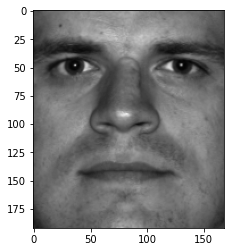

Restored Pic  1


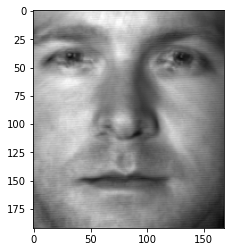

Actual Pic  2


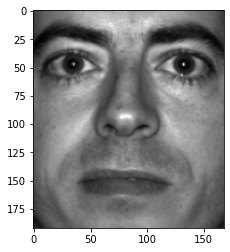

Restored Pic  2


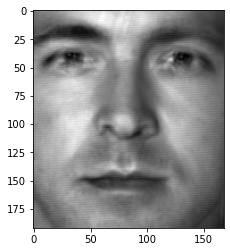

Actual Pic  3


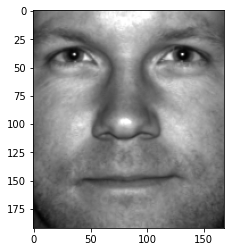

Restored Pic  3


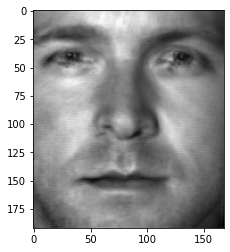

In [8]:
rnd = random.sample(range(10), 3)
rnd = (pd.Series(rnd) * 5).tolist()
imgs = PC[rnd]

for i,img in enumerate(imgs):
    restore = mean + np.matmul(Vp.T , img)
    print("Actual Pic " , i + 1)
    plt.imshow(np.reshape(trainf[rnd[i]], (192, 168)) , cmap = 'gray')
    plt.show() 
    print("Restored Pic " , i + 1)
    plt.imshow(np.reshape(restore, (192, 168)) , cmap = 'gray')
    plt.show() 

Actual Pic  1


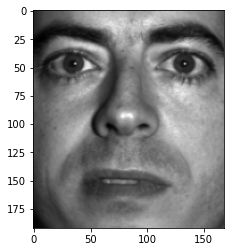

Restored Pic  1


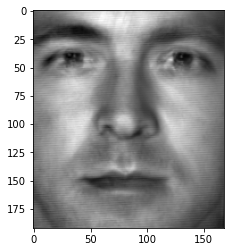

Actual Pic  2


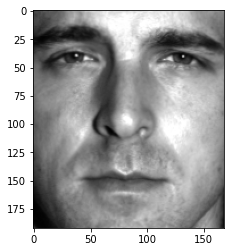

Restored Pic  2


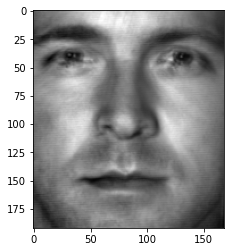

Actual Pic  3


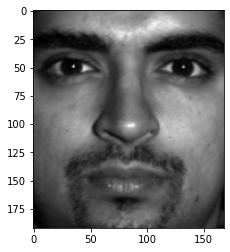

Restored Pic  3


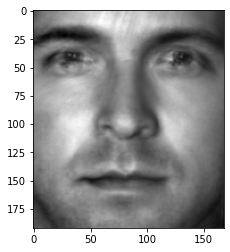

In [9]:
PC = np.matmul(Vp, testf.T).T
rnd = random.sample(range(10), 3)
rnd = (pd.Series(rnd) * 4).tolist()
imgs = PC[rnd]

for i,img in enumerate(imgs):
    restore = mean + np.matmul(Vp.T , img)
    print("Actual Pic " , i + 1)
    plt.imshow(np.reshape(testf[rnd[i]], (192, 168)) , cmap = 'gray')
    plt.show() 
    print("Restored Pic " , i + 1)
    plt.imshow(np.reshape(restore, (192, 168)) , cmap = 'gray')
    plt.show() 

C

In [10]:
varex = eig_vals / sum(eig_vals)
cumsum = np.cumsum(varex)

count = 1
while cumsum[count - 1] < 0.9 : count += 1
    
print("Count : " , count)

Count :  9


D

In [11]:
X_test = testf
y_test = sorted([i for i in range(10)] * 4)
X_train = trainf
y_train = sorted([i for i in range(10)] * 5)

In [12]:
SVM = svm.SVC(kernel='linear')
SVM.fit(X_train, np.array(y_train))

accuracy_test = SVM.score(X_test, y_test)
accuracy_train = SVM.score(X_train, y_train)

print("Actual Test Data Accuracy : " , accuracy_test)
print("Actual Train Data Accuracy : " , accuracy_train)

Actual Test Data Accuracy :  0.525
Actual Train Data Accuracy :  1.0


In [13]:
Vp = V[:9]

X_train = np.matmul(Vp, trainf.T).T
X_test = np.matmul(Vp , testf.T).T

SVM = svm.SVC(kernel='linear')
SVM.fit(X_train, np.array(y_train))

accuracy_test = SVM.score(X_test, y_test)
accuracy_train = SVM.score(X_train, y_train)

print("PCA Test Data Accuracy : " , accuracy_test)
print("PCA Train Data Accuracy : " , accuracy_train)

PCA Test Data Accuracy :  0.5
PCA Train Data Accuracy :  1.0
